In [1]:
print("ola eu sou a bea")

ola


In [1]:
print("tou me a passar")

tou me a passar


Text Mining project


In [30]:
#!pip install langdetect

import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\barbara\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
train_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\train.xlsx'
train_reviews_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\train_reviews.xlsx'
test_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\test.xlsx'
test_reviews_path = r'C:\Users\barbara\Desktop\Catarina NOVA\Text Mining\Project\Project Corpora\test_reviews.xlsx'

train = pd.read_excel(train_path)
train_reviews = pd.read_excel(train_reviews_path)
test = pd.read_excel(test_path)
test_reviews = pd.read_excel(test_reviews_path)

# sou noob e nunca sei fazer isto de maneira melhor desculpem 

In [6]:
train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [7]:
train.set_index('index', inplace=True)
train_reviews.set_index('index', inplace=True)
test.set_index('index', inplace=True)
test_reviews.set_index('index', inplace=True)

In [8]:
train.head()

,description,host_about,unlisted
index,,,
1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [9]:
train = train.copy()
train_reviews = train_reviews.copy()
test = test.copy()
test_reviews = test_reviews.copy()

In [12]:
print(train.shape)
print(test.shape)

(6248, 3)
(695, 2)


In [19]:
train.duplicated().sum()

192

In [21]:
train_reviews.duplicated().sum()

6781

In [22]:
test.duplicated().sum()

4

In [23]:
test_reviews.duplicated().sum()

438

i guess que apagamos todos os duplicados? 

In [39]:
train.isna().sum()

index          0
description    0
host_about     0
unlisted       0
language       0
dtype: int64

In [40]:
train_reviews.isna().sum()

index       0
comments    0
dtype: int64

In [42]:
test.isna().sum()

index          0
description    0
host_about     0
dtype: int64

In [41]:
test_reviews.isna().sum()

index       0
comments    0
dtype: int64

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
unlisted,6248.0,0.273367,0.445724,0.0,0.0,0.0,1.0,1.0


In [33]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

train["language"] = train["description"].apply(detect_language)
train.head()

,index,description,host_about,unlisted,language
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,en
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,pt
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,en
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,pt
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,fr


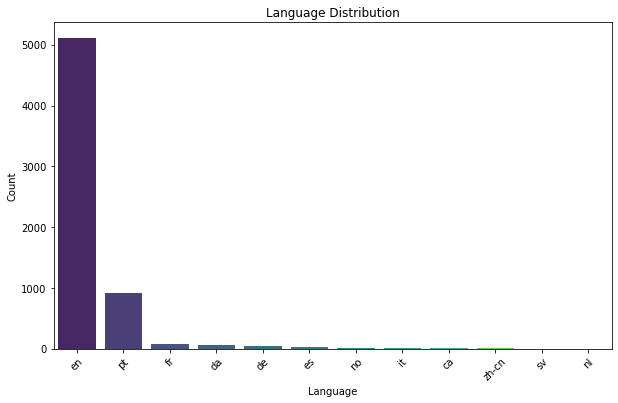

In [37]:
language_counts = train["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [36]:
train["language"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

'en': English 
'pt': Portuguese
'fr': French
'es': Spanish
'de': German
'da': Danish
'no': Norwegian
'sv': Swedish
'it': Italian
'ca': Catalan
'zh-cn': Chinese (Simplified)
'nl': Dutch

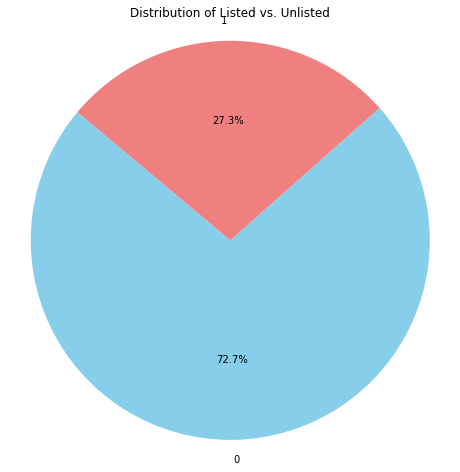

In [38]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()